In [21]:
import numpy as np

In [22]:
beta = 1
n_parties = 100

In [23]:
y_train = []

for i in range(10):
    y_train += [i] * 6000
y_train = np.array(y_train)

In [24]:
import random

random.shuffle(y_train)

In [25]:
min_size = 0
min_require_size = 10
K = 10

N = 60000
np.random.seed(2020)
net_dataidx_map = {}

while min_size < min_require_size:
    print(min_size)
    idx_batch = [[] for _ in range(n_parties)]
    for k in range(K):
        idx_k = np.where(y_train == k)[0]
        
        np.random.shuffle(idx_k)
        proportions = np.random.dirichlet(np.repeat(beta, n_parties))

        proportions = np.array([p * (len(idx_j) < N / n_parties) for p, idx_j in zip(proportions, idx_batch)])

        proportions = proportions / proportions.sum()

        proportions = (np.cumsum(proportions) * len(idx_k)).astype(int)[:-1]

        idx_batch = [idx_j + idx.tolist() for idx_j, idx in zip(idx_batch, np.split(idx_k, proportions))]

        min_size = min([len(idx_j) for idx_j in idx_batch])


for j in range(n_parties):
    np.random.shuffle(idx_batch[j])
    net_dataidx_map[j] = idx_batch[j]

0


In [27]:
net_dataidx_map[0]

[33099,
 23288,
 49444,
 36492,
 54743,
 45715,
 332,
 46963,
 58636,
 19256,
 14050,
 58400,
 52807,
 58667,
 34292,
 42938,
 10593,
 46010,
 28018,
 31238,
 31780,
 40434,
 40788,
 5861,
 50739,
 57246,
 6689,
 5917,
 54567,
 21117,
 22343,
 29760,
 56583,
 46933,
 15654,
 605,
 12316,
 8157,
 37223,
 1534,
 22830,
 28425,
 49534,
 31068,
 40497,
 19537,
 25481,
 48957,
 1137,
 50020,
 30371,
 18246,
 48230,
 4693,
 22783,
 37494,
 6433,
 13808,
 56293,
 14590,
 21148,
 52292,
 54332,
 33619,
 48121,
 14974,
 8342,
 16481,
 25687,
 10685,
 12456,
 32512,
 7483,
 2822,
 45448,
 5216,
 40966,
 9234,
 10957,
 51655,
 42176,
 23326,
 16592,
 58920,
 43757,
 36420,
 26344,
 16571,
 39245,
 53489,
 54806,
 41078,
 9663,
 54555,
 38427,
 22165,
 41720,
 38529,
 2508,
 33840,
 19409,
 47817,
 59708,
 46297,
 4187,
 36947,
 59897,
 20947,
 25526,
 18149,
 18181,
 37449,
 31323,
 57671,
 27580,
 22992,
 28987,
 958,
 47685,
 3187,
 22855,
 52651,
 28320,
 8417,
 57271,
 56927,
 59318,
 4401,
 

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Pies Consumed')

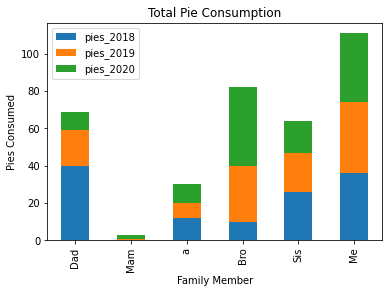

In [20]:
plotdata = pd.DataFrame({
    "pies_2018":[40, 0, 12, 10, 26, 36],
    "pies_2019":[19, 1, 8, 30, 21, 38],
    "pies_2020":[10, 2, 10, 42, 17, 37]
    }, 
    index=["Dad", "Mam", "a", "Bro", "Sis", "Me"]
)
plotdata.plot(kind='bar', stacked=True)
plt.title("Total Pie Consumption")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")